In [2]:
#Importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib 
from matplotlib import pylab as plt

In [3]:
#Reading in CSV file
og_df = pd.read_csv('/Users/maxboucher/Desktop/Data Science Project/Airbnb Booking/data/airbnb.csv')
og_df.head()

,id_visitor,id_session,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,...,next_id_session,next_dim_session_number,next_dim_user_agent,next_dim_device_app_combo,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2/16/15,2/16/15 21:50,2/16/15 22:13,0,0,...,b812bf56bf89b0b31f4e5b50d0c15ff8,84.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/18/15,2/18/15 11:57,2/18/15 12:12,0.0,0.0,0.0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/18/15,2/18/15 11:57,2/18/15 12:12,0,0,...,456083b5f5506ad125d595006819de1d,85.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/18/15,2/18/15 13:02,2/18/15 13:05,0.0,0.0,0.0
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/18/15,2/18/15 13:02,2/18/15 13:05,0,0,...,94d30e9f3c8f92ae691e49d77a884777,86.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/18/15,2/18/15 14:18,2/18/15 14:28,0.0,0.0,0.0
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/18/15,2/18/15 14:18,2/18/15 14:28,0,0,...,ab02139dc81bea4b126cf5043faf53d9,87.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/19/15,2/19/15 12:24,2/19/15 12:24,0.0,0.0,0.0
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/19/15,2/19/15 12:24,2/19/15 12:24,0,0,...,6a69db1a5876e9798947f20e2c52bcc8,88.0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2/19/15,2/19/15 22:21,2/19/15 22:22,0.0,0.0,0.0


In [4]:
og_df.shape

(7756, 21)

In [5]:
#Creating new dataframe after realizing that all the "next..." variables contain the same data as the following row as well as remove unecessary columnc for model
df = og_df.drop(['next_id_session', 'next_dim_session_number', 'next_dim_user_agent', 'next_dim_device_app_combo',
                      'next_ds', 'next_ts_min', 'next_ts_max', 'next_did_search', 'next_sent_message', 'next_sent_booking_request', 'dim_user_agent'], axis=1)
df.head()

,id_visitor,id_session,dim_session_number,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,iPhone - iOS,2/16/15,2/16/15 21:50,2/16/15 22:13,0,0,0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Desktop - Chrome,2/18/15,2/18/15 11:57,2/18/15 12:12,0,0,0
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,Desktop - Chrome,2/18/15,2/18/15 13:02,2/18/15 13:05,0,0,0
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,Desktop - Chrome,2/18/15,2/18/15 14:18,2/18/15 14:28,0,0,0
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,Desktop - Chrome,2/19/15,2/19/15 12:24,2/19/15 12:24,0,0,0


In [6]:
# Creating a Session Length variable that measures the time they spend on Airbnb in minutes

# Convert 'ts_min' and 'ts_max' to datetime objects
df['ts_min'] = pd.to_datetime(df['ts_min'], format='%m/%d/%y %H:%M')
df['ts_max'] = pd.to_datetime(df['ts_max'], format='%m/%d/%y %H:%M')

# Calculate session length in minutes
df['session_length'] = (df['ts_max'] - df['ts_min']).dt.total_seconds() / 60

#removing "ts_max" and "ts_min" values as they are no longer needed
# NOTE TO REMOVE DATE VARIABLE LATER
df = df.drop(['ts_max','ts_min'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7756 entries, 0 to 7755
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_visitor            7756 non-null   object 
 1   id_session            7756 non-null   object 
 2   dim_session_number    7756 non-null   int64  
 3   dim_device_app_combo  7756 non-null   object 
 4   ds                    7756 non-null   object 
 5   did_search            7756 non-null   int64  
 6   sent_message          7756 non-null   int64  
 7   sent_booking_request  7756 non-null   int64  
 8   session_length        7756 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 545.5+ KB


In [8]:
#Getting a better understanding of numeric variables
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,dim_session_number,did_search,sent_message,sent_booking_request,session_length
count,7756.000000,7756.000000,7756.000000,7756.000000,7756.000000
mean,98.091671,0.159360,0.164905,0.018695,10.745616
std,131.533939,0.366036,0.371118,0.135455,27.300551
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,0.000000,0.000000,0.000000,1.000000
75%,128.000000,0.000000,0.000000,0.000000,10.000000
max,702.000000,1.000000,1.000000,1.000000,641.000000


In [9]:
print("There are", df['id_visitor'].nunique(), "unique visitors for 7756 total sessions")
print("There are", df['id_session'].nunique(), "unique sessions")
print("There are", df['dim_device_app_combo'].nunique(), "unique device-app combos")

There are 630 unique visitors for 7756 total sessions
There are 7756 unique sessions
There are 17 unique device-app combos


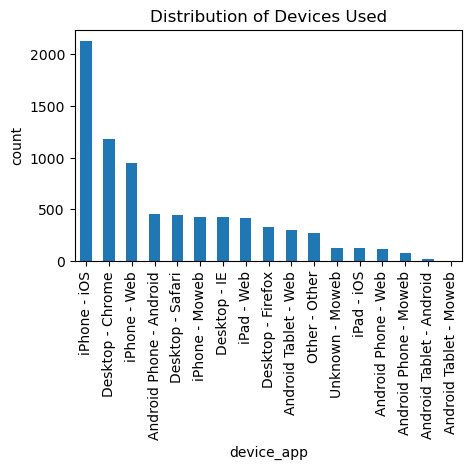

In [10]:
plt.figure(figsize=(5,3))
pd.value_counts(df['dim_device_app_combo']).plot.bar()
plt.ylabel('count')
plt.xlabel('device_app')
plt.title('Distribution of Devices Used')
plt.show()

In [11]:
df['session_length'].value_counts()
#Important note: 3012 of the session_length are under a minute

session_length
0.0      3012
1.0       878
2.0       435
3.0       333
4.0       273
         ... 
142.0       1
143.0       1
307.0       1
178.0       1
396.0       1
Name: count, Length: 169, dtype: int64

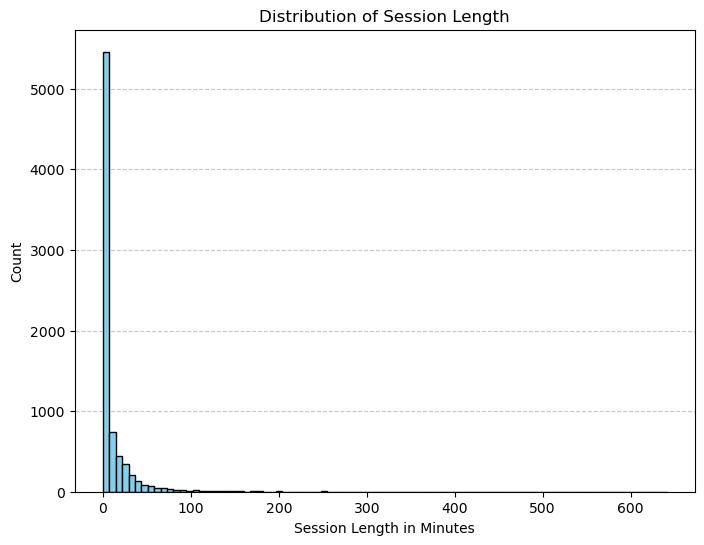

In [12]:
#Visualizing distribution of Session Length
plt.figure(figsize=(8, 6))

n_bins = int(np.sqrt(df.shape[0]))
plt.hist(df['session_length'], bins=n_bins, color='skyblue', edgecolor='black')

plt.title('Distribution of Session Length')
plt.xlabel('Session Length in Minutes')
plt.ylabel('Count')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [13]:
df.nunique()

id_visitor               630
id_session              7756
dim_session_number       702
dim_device_app_combo      17
ds                       349
did_search                 2
sent_message               2
sent_booking_request       2
session_length           169
dtype: int64

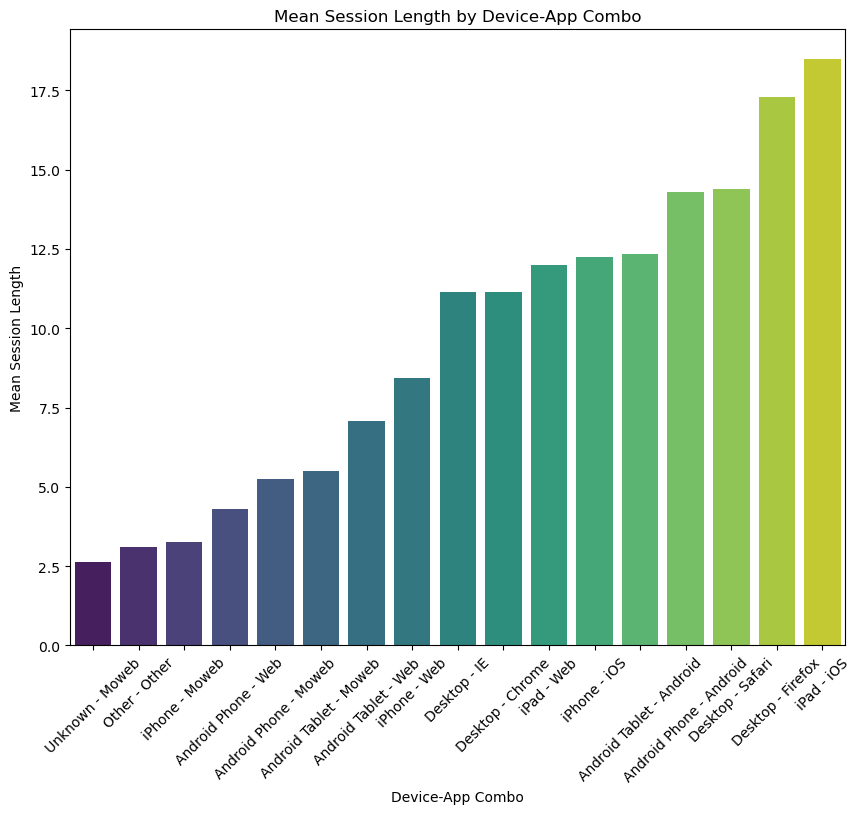

In [14]:

mean_session_length = df.groupby('dim_device_app_combo')['session_length'].mean().reset_index()


mean_session_length = mean_session_length.sort_values(by='session_length')

plt.figure(figsize=(10, 8))
sns.barplot(data=mean_session_length, x='dim_device_app_combo', y='session_length', palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Device-App Combo')
plt.ylabel('Mean Session Length')
plt.title('Mean Session Length by Device-App Combo')
plt.show()


In [15]:
#Understanding the ratio breakdown of different user actions on Airbnb platform
def ratio(lst):
    yes = 0
    no = 0
    for n in lst:
        if n == 1:
            yes += 1
        else:
            no += 1
    return (round((yes / (no + yes))* 100, 1))
print("The booking rate is:", ratio(df['sent_booking_request']))
print("The message sent rate is:", ratio(df['sent_message']))
print("The search rate is:", ratio(df['did_search']))

The booking rate is: 1.9
The message sent rate is: 16.5
The search rate is: 15.9


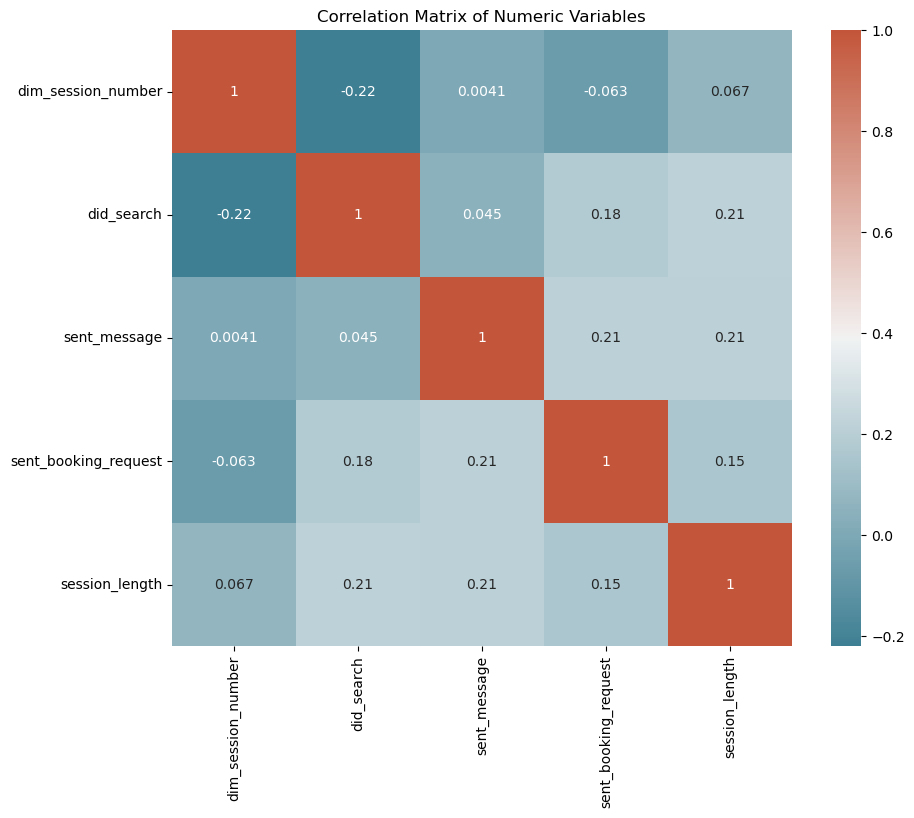

In [16]:
#Calculating the Correlation Matrix
# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
corr = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix of Numeric Variables')
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

plt.show()

In [17]:
#Setting up different conditions for activity on platform
search=df[(df['did_search']==1)]
search_sent=df[(df['did_search']==1) & (df['sent_message']==1)]
sent_booking=df[(df['sent_booking_request']==1) & (df['sent_message']==1)]
search_booking=df[(df['did_search']==1) & (df['sent_booking_request']==1)]
booking=df[(df['sent_booking_request']==1)]

dicti=pd.DataFrame([{'conversion rate search & booking / search':search_booking.shape[0]/search.shape[0]},
       {'conversion rate search & booking / search&sent a message':search_booking.shape[0]/search_sent.shape[0]},
       {'conversion rate sent a message & booking / booking':sent_booking.shape[0]/booking.shape[0]}])
dicti

,conversion rate search & booking / search,conversion rate search & booking / search&sent a message,conversion rate sent a message & booking / booking
0,0.073625,NaN,NaN
1,NaN,0.36255,NaN
2,NaN,NaN,0.737931


In [18]:
# Define a custom mapping function
def map_device_category(device):
    if 'Desktop' in device:
        return 'Desktop'
    elif 'iPhone' in device or 'iPad' in device:
        return 'iPhone/Ipad'
    elif 'Android' in device:
        return 'Android'
    else:
        return 'Other'

# Apply the mapping function to create a new 'device_category' column
df['device_category'] = df['dim_device_app_combo'].apply(map_device_category)

# Check the result
print(df[['dim_device_app_combo', 'device_category']])


     dim_device_app_combo device_category
0            iPhone - iOS     iPhone/Ipad
1        Desktop - Chrome         Desktop
2        Desktop - Chrome         Desktop
3        Desktop - Chrome         Desktop
4        Desktop - Chrome         Desktop
...                   ...             ...
7751           iPad - Web     iPhone/Ipad
7752           iPad - Web     iPhone/Ipad
7753           iPad - Web     iPhone/Ipad
7754           iPad - Web     iPhone/Ipad
7755     Desktop - Chrome         Desktop

[7756 rows x 2 columns]


<Axes: title={'center': 'Devices for Booking Request'}, ylabel='device_category'>

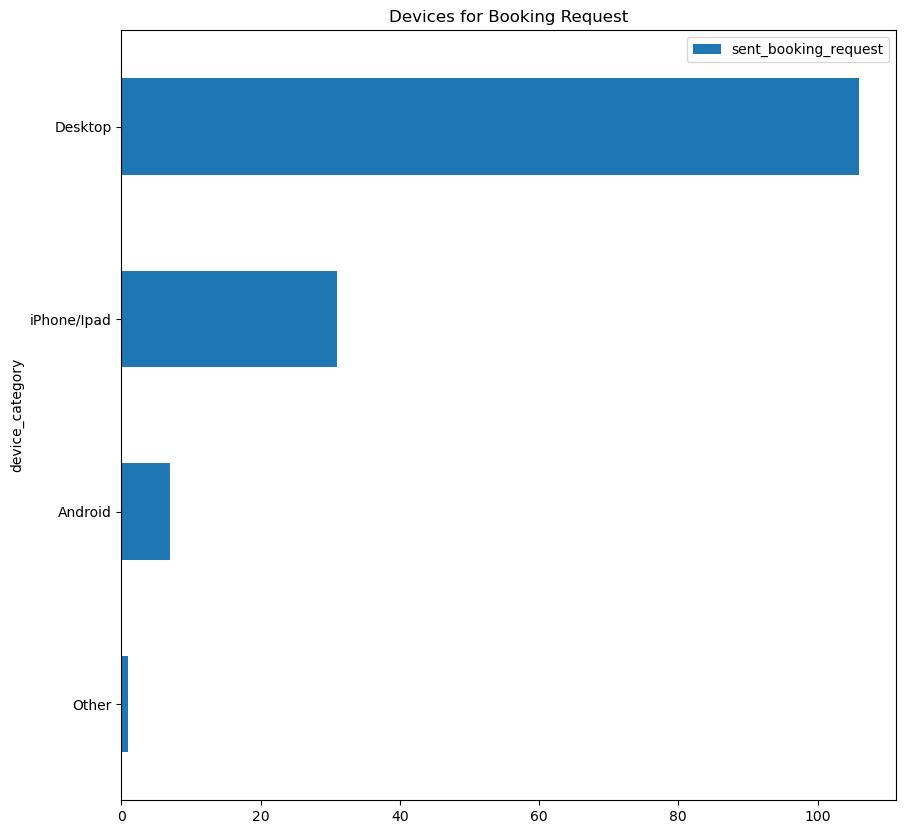

In [19]:
fig, ax = plt.subplots()
plt.title('Devices for Booking Request')
ax.set_xlabel('Number of bookings')
df[['device_category','sent_booking_request']].groupby('device_category').sum().sort_values(by='sent_booking_request').plot(kind='barh', figsize=(10,10), ax=ax)

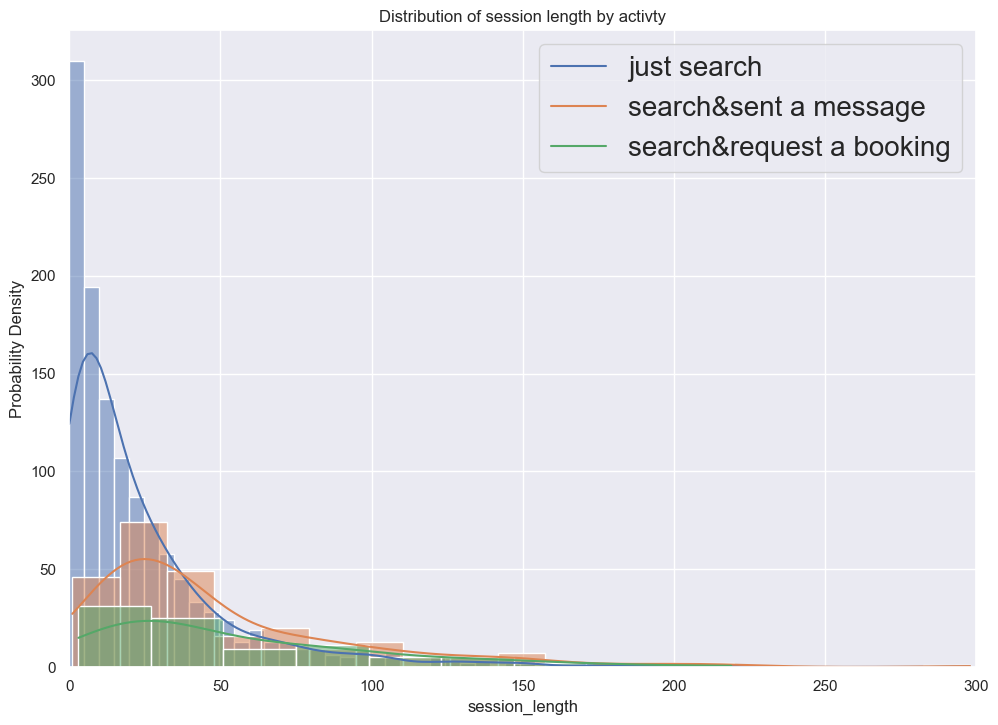

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(search["session_length"],kde=True)
sns.histplot(search_sent["session_length"],kde=True)
sns.histplot(search_booking["session_length"],kde=True)
plt.legend(labels=['just search','search&sent a message','search&request a booking'],prop={'size': 20})
plt.ylabel("Probability Density")
plt.xlim(0, 300)
plt.title('Distribution of session length by activty')
plt.savefig("EDA Session Length by Activity")
plt.show()

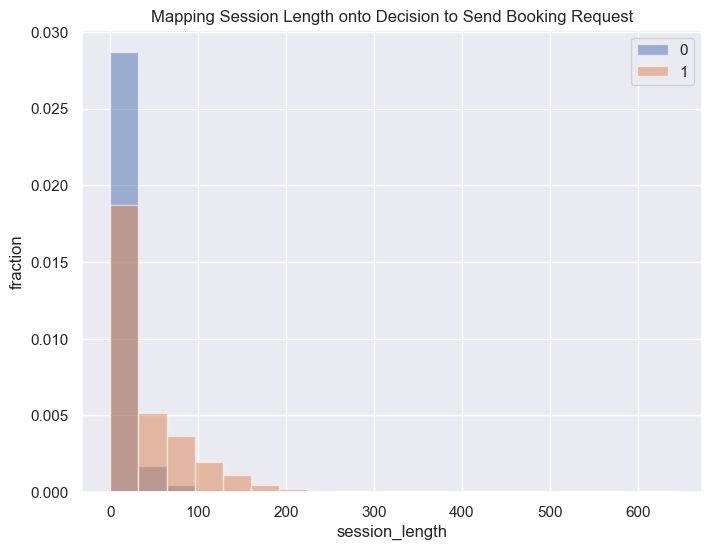

In [21]:
categories = df['sent_booking_request'].unique()
bin_range = (df['session_length'].min(),df['session_length'].max())

plt.figure(figsize=(8,6))

for c in categories:
    plt.hist(df[df['sent_booking_request']==c]['session_length'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.title('Mapping Session Length onto Decision to Send Booking Request')
plt.ylabel('fraction')
plt.xlabel('session_length')
plt.show()

## Understanding individual user behavior ##

In [22]:
#Understand behavior of one user first (detect patterns)
first_user = df[df['id_visitor'] == 'ed1329a6-064d-47e9-93bc-93f5a50822df']
first_user.head()

,id_visitor,id_session,dim_session_number,dim_device_app_combo,ds,did_search,sent_message,sent_booking_request,session_length,device_category
0,ed1329a6-064d-47e9-93bc-93f5a50822df,a8dfb8ed5aa79e00ff14b2da297c9778,83,iPhone - iOS,2/16/15,0,0,0,23.0,iPhone/Ipad
1,ed1329a6-064d-47e9-93bc-93f5a50822df,950277daef16f86dc2c05d2b212eea81,84,Desktop - Chrome,2/18/15,0,0,0,15.0,Desktop
2,ed1329a6-064d-47e9-93bc-93f5a50822df,ee4e2f99dd0c0bef2d40e4bdf880c862,85,Desktop - Chrome,2/18/15,0,0,0,3.0,Desktop
3,ed1329a6-064d-47e9-93bc-93f5a50822df,59fbde7b5d35403116c461fa7fc1ab6e,86,Desktop - Chrome,2/18/15,0,0,0,10.0,Desktop
4,ed1329a6-064d-47e9-93bc-93f5a50822df,ec8972a3c7256ea4dcba61ee2bd9e3a8,87,Desktop - Chrome,2/19/15,0,0,0,0.0,Desktop


In [23]:
# Checking if all of users sessions are logged
session_numbers = first_user['dim_session_number'].tolist()
print(session_numbers)

[83, 84, 85, 86, 87, 88, 89, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]


In [24]:
first_user['sent_booking_request'].value_counts()

sent_booking_request
0    74
1    15
Name: count, dtype: int64

In [25]:
first_user['dim_device_app_combo'].value_counts()

dim_device_app_combo
Desktop - Chrome    76
iPhone - iOS        13
Name: count, dtype: int64

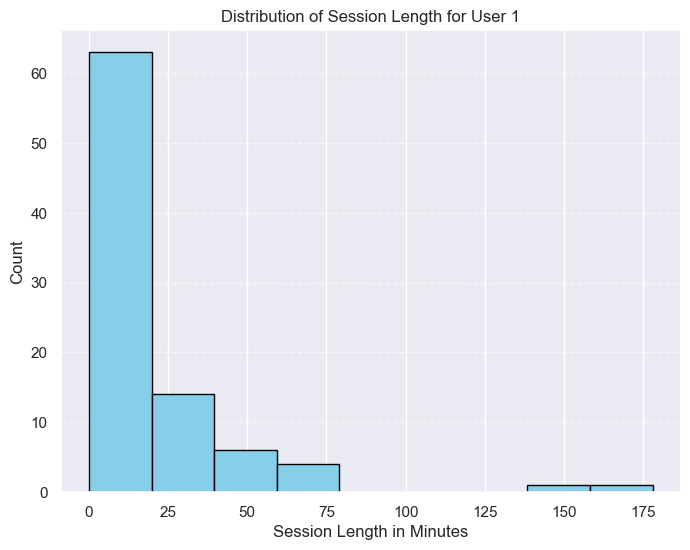

In [26]:
#Visualizing distribution of Session Length for User 1
plt.figure(figsize=(8, 6))

n_bins = int(np.sqrt(first_user.shape[0]))
plt.hist(first_user['session_length'], bins=n_bins, color='skyblue', edgecolor='black')

plt.title('Distribution of Session Length for User 1')
plt.xlabel('Session Length in Minutes')
plt.ylabel('Count')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


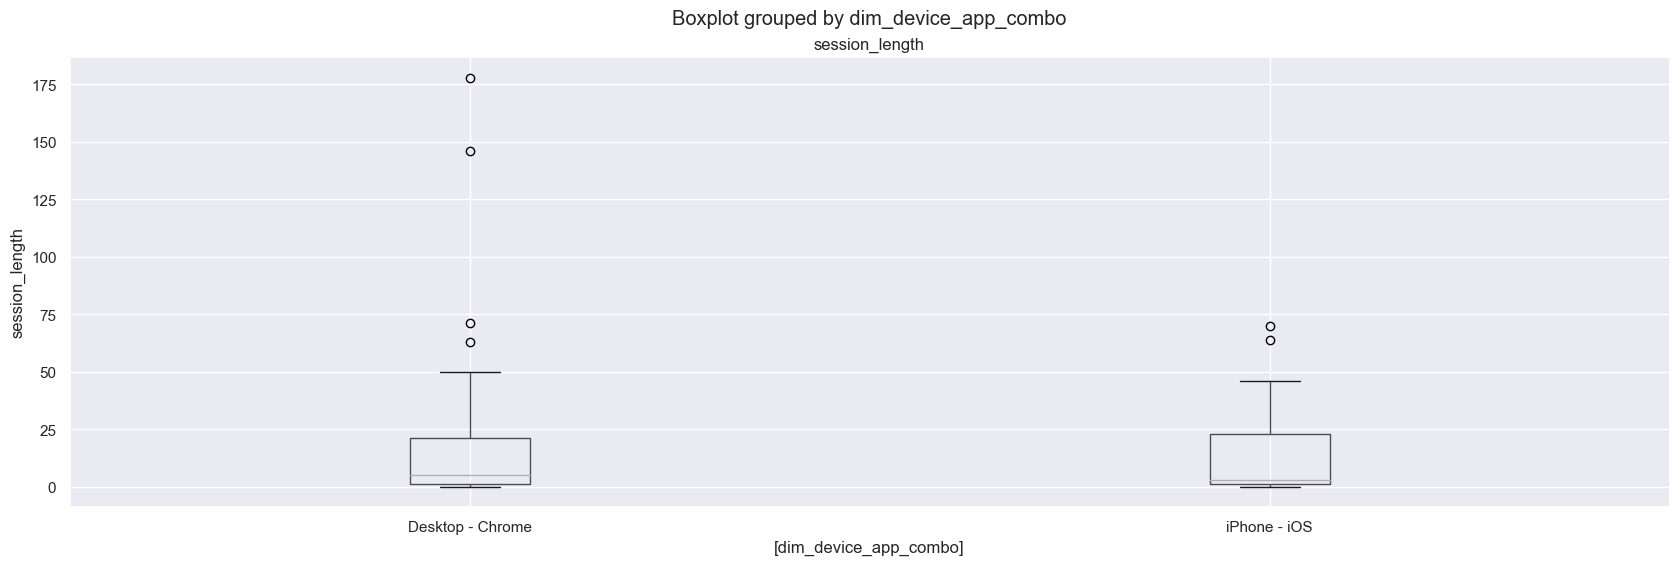

In [27]:
first_user[['session_length','dim_device_app_combo']].boxplot(by='dim_device_app_combo',figsize=(20,6))
plt.ylabel('session_length')
plt.show()

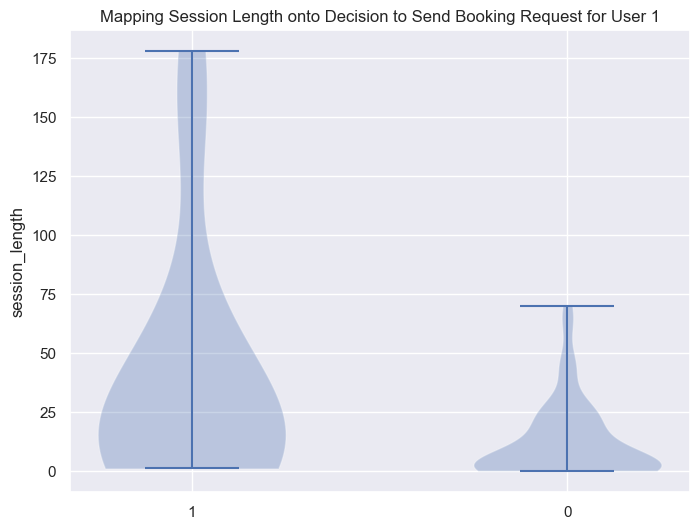

In [28]:
dataset = [first_user[first_user['sent_booking_request']== 1 ]['session_length'].values,
           first_user[first_user['sent_booking_request']== 0 ]['session_length'].values]

plt.figure(figsize=(8,6))

plt.violinplot(dataset = dataset)
plt.title('Mapping Session Length onto Decision to Send Booking Request for User 1')
plt.xticks([1,2],['1','0'])
plt.ylabel('session_length')
plt.show()

In [29]:
search=first_user[(first_user['did_search']==1)]
search_sent=first_user[(first_user['did_search']==1) & (first_user['sent_message']==1)]
sent_booking=first_user[(first_user['sent_booking_request']==1) & (first_user['sent_message']==1)]
search_booking=first_user[(first_user['did_search']==1) & (first_user['sent_booking_request']==1)]
booking=first_user[(first_user['sent_booking_request']==1)]

dicti=pd.DataFrame([{'conversion rate search & booking / search':search_booking.shape[0]/search.shape[0]},
       {'conversion rate search & booking / search&sent a message':search_booking.shape[0]/search_sent.shape[0]},
       {'conversion rate sent a message & booking / booking':sent_booking.shape[0]/booking.shape[0]}])


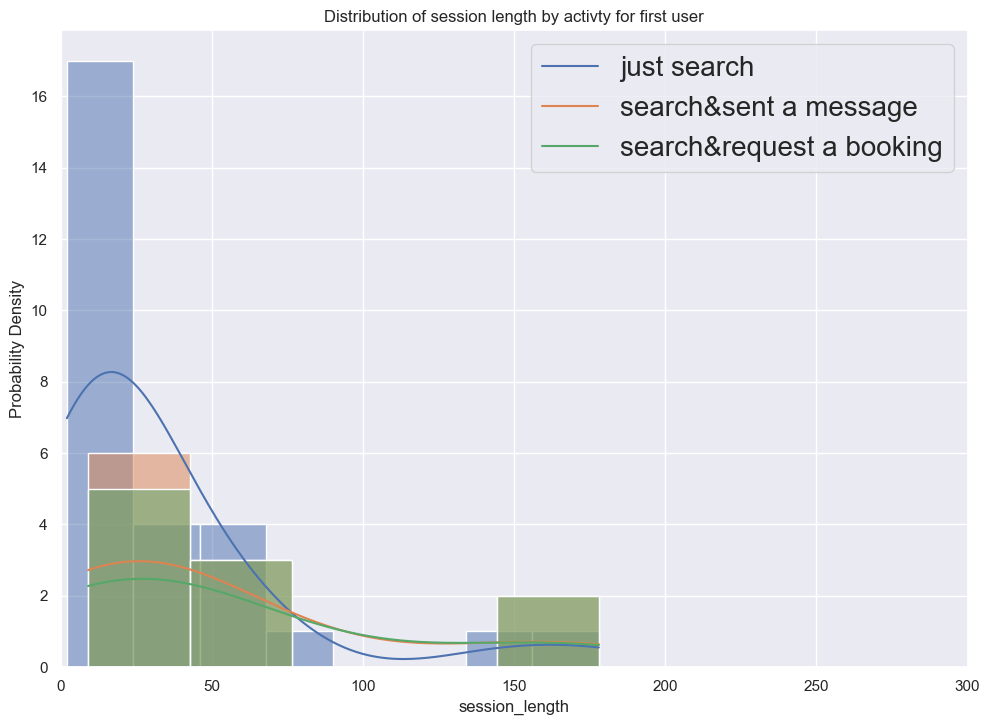

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(search["session_length"],kde=True)
sns.histplot(search_sent["session_length"],kde=True)
sns.histplot(search_booking["session_length"],kde=True)
plt.legend(labels=['just search','search&sent a message','search&request a booking'],prop={'size': 20})
plt.ylabel("Probability Density")
plt.xlim(0, 300)
plt.title('Distribution of session length by activty for first user')
plt.show()

# Splitting & Preprocessing

1. Preprocessing (non-iid data)
   
if you want to predict the outcome of a new user's interaction with platform:
- your test score must be based on users not included in training and validation
- your validation score must be based on users not included in training
- points of one user should not be distributed over multiple sets because your generalization error will be off

3. Missing values (dim_user_agent)
   - For missing data, we'll just drop the column for dim_user_agent which is done much earlier (EDA) as it is not relevant to the prediction.

In [22]:
#Selecting the Y and X for splitting
y = df['sent_booking_request']
User_ID = df['id_visitor']
X = df.drop(columns=['id_visitor','id_session','ds','sent_booking_request']) 
classes, counts = np.unique(y,return_counts=True)     #finds number of classes and points in each class
print(classes, counts)
print('balance:',np.max(counts/len(y)))
X.head()

[0 1] [7611  145]
balance: 0.9813047962867457


,dim_session_number,dim_device_app_combo,did_search,sent_message,session_length,device_category
0,83,iPhone - iOS,0,0,23.0,iPhone/Ipad
1,84,Desktop - Chrome,0,0,15.0,Desktop
2,85,Desktop - Chrome,0,0,3.0,Desktop
3,86,Desktop - Chrome,0,0,10.0,Desktop
4,87,Desktop - Chrome,0,0,0.0,Desktop


In [26]:
from sklearn.metrics import fbeta_score
# Calculating the fraction of sent_booking_request = 1
np.random.seed(422)
fraction_positive_class = np.mean(y)

# Generate baseline predictions based on the fraction of positive class
baseline_predictions = np.random.choice([0, 1], size=len(y), p=[1 - fraction_positive_class, fraction_positive_class])

# Calculate F-beta score for the baseline predictions
baseline_fbeta = fbeta_score(y, baseline_predictions, beta=0.5)

print(f"Baseline F-beta (0.5) score: {baseline_fbeta}")

Baseline F-beta (0.5) score: 0.020463847203274214


As we are trying to predict if a new user will send a booking request in this question, our target variable is "sent_booking_request" which represents if someone sent the booking request (1) or did not (0). Since the data is obtained from different subjects with several samples per-subject, we need the model to be flexible enough to learn from highly specific features and avoid failing to generalize to new subjects. In effect, GroupKFold allows us to control for overfitting be making sure that each subject is in a different testing fold, and the same group is not represented in both testing and training sets. Additionally, because of the imbalance in the data (there are more samples for certain users than others), each fold will not be exactly the same size. 

GroupKFold is a variation of k-fold which ensures that the same group is not represented in both testing/validation and training sets. For example if the data is obtained from different subjects with several samples per-subject and if the model is flexible enough to learn from highly person specific features it could fail to generalize to new subjects. GroupKFold makes it possible to detect this kind of overfitting situations.

For binary variables used as features in the machine learning model("did_search","sent_message","sent_booking_request", you can directly use the 0 and 1 values without any additional encoding or scaling. Label encoding and standard scaling are more relevant for other types of variables, such as categorical variables with multiple categories or continuous numerical variables.

#### The f_beta score
Weighted harmonic mean of P and R:
### <center> $f_{\beta} = (1 + \beta^2) \frac{P R}{\beta^2 P + R}$ </center>

If $\beta = 1$, we have the f1 score:
### <center> $f_{1} = 2 \frac{P R}{P + R}$ </center>

If $\beta < 1$, more weight to precision. So were choosing 0.5 as we value having less false positives (people who are predicted as making a booking even though they didn't) because the data is so imbalanced that any booking requests that are sent are significant.

If $\beta > 1$, more weight to recall.


In [82]:
from sklearn.model_selection import KFold, GroupKFold, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.metrics import fbeta_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer


onehot_ftrs = ['dim_device_app_combo'] #categorical variable but no need to order
minmax_ftrs = ['dim_session_number']  #continuous variable that is reasonably bounded
std_ftrs = ['session_length']     #continuous feature that follows a tailed distribution

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])


def MLpipe_GroupKFold_fbeta(X, y, preprocessor, ML_algo, param_grid, groups=df.id_visitor):
    '''
    This function splits the data into train/validation (80/20) and then applies GroupKFold with 5 folds to the training set.
    The F-beta score (beta=0.5) is maximized in cross-validation.

    You should:

    1. Loop through 10 different random states
    2. Split your data into train/validation (80/20)
    3. Fit a model using GridSearchCV with GroupKFold and the predefined preprocessor 
    4. Calculate the model's F-beta score on the test set 
    5. Return a list of 10 test scores and 10 best models 
    '''
    
    # Lists to be returned 
    test_scores = []
    best_models = []

    # Number of random states to try
    num_random_states = 10

    for random_state in range(num_random_states):
        # 1. Split the data into train/test (80/20)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

        # 2. Create GroupKFold cross-validator
        group_kfold = GroupKFold(n_splits=3)

        # 3. Create a Pipeline with the preprocessor and ML algorithm
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', ML_algo)
        ])

        # 4. Use GridSearchCV to find the best model using GroupKFold cross-validation
        grid_search = GridSearchCV(pipeline, param_grid, cv=group_kfold, 
                                   scoring=make_scorer(fbeta_score, beta=0.8), 
                                   n_jobs=-1, verbose=1)

        grid_search.fit(X_train, y_train, groups=groups[X_train.index])

        best_model = grid_search.best_estimator_

        # 5. Calculate the F-beta score on the test set
        y_pred_test = best_model.predict(X_test)
        test_fbeta = fbeta_score(y_test, y_pred_test, beta=0.5)
        test_scores.append(test_fbeta)
        best_models.append(best_model)

        print(f"Random State {random_state + 1} - Test F-beta (beta=0.5): {test_fbeta}")

    return test_scores, best_models



# Testing Models


Training and evaluating Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Random State 1 - Test F-beta (beta=0.5): 0.0
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Random State 2 - Test F-beta (beta=0.5): 0.0
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Random State 3 - Test F-beta (beta=0.5): 0.0
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Random State 4 - Test F-beta (beta=0.5): 0.16129032258064516
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Random State 5 - Test F-beta (beta=0.5): 0.0
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Random State 6 - Test F-beta (beta=0.5): 0.0
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Random State 7 - Test F-beta (beta=0.5): 0.1388888888888889
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Random State 8 - Test F-beta (beta=0.5): 0.1388888888888889
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Random 

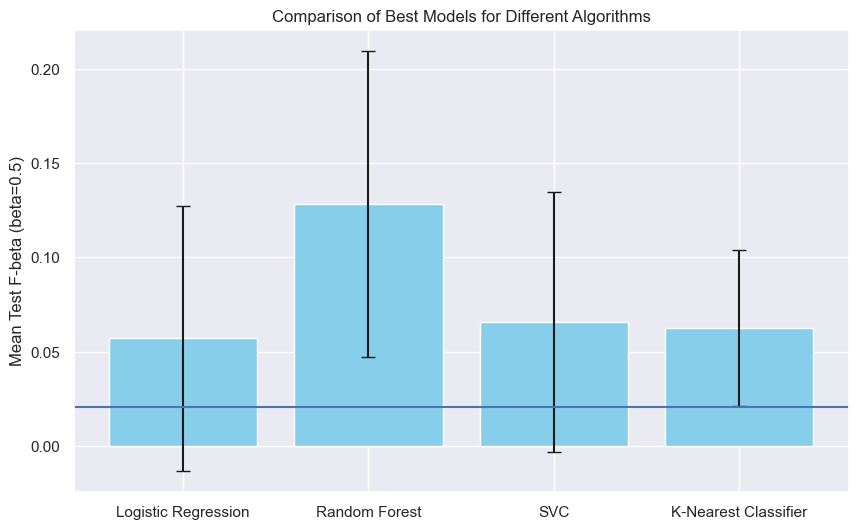

In [84]:
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(422)
# Define parameter grids for different models
rf_param_grid = {
    'classifier__n_estimators': [1, 3, 10, 30],
    'classifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

svc_param_grid = {
    'classifier__gamma': [1e-3, 1e-1, 1e1, 1e3, 1e5],
    'classifier__C': [1e-1, 1e0, 1e1]
}

knn_param_grid = {
    'classifier__n_neighbors': [1, 10, 25, 50],
    'classifier__weights': ['uniform', 'distance']
}

logreg_param_grid = {
    'classifier__penalty': ['l2'],
    'classifier__C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2],
    'classifier__max_iter': [10000]
}

# Train and evaluate models
models = [
    ('Logistic Regression', LogisticRegression(), logreg_param_grid),
    ('Random Forest', RandomForestClassifier(), rf_param_grid),
    ('SVC', SVC(), svc_param_grid),
    ('K-Nearest Classifier', KNeighborsClassifier(), knn_param_grid)
]
best_models = {}
results = {}
for model_name, model, param_grid in models:
    print(f"Training and evaluating {model_name}...")

    test_scores, current_best_models= MLpipe_GroupKFold_fbeta(X, y, preprocessor=preprocessor, ML_algo=model, param_grid=param_grid)

    mean_fbeta = np.mean(test_scores)
    std_fbeta = np.std(test_scores)

    results[model_name] = {'mean_fbeta': mean_fbeta, 'std_fbeta': std_fbeta, 'best_models': current_best_models}
    print(f"{model_name} - Mean Test F-beta (beta=0.5): {mean_fbeta}, Std Deviation of Test F-beta: {std_fbeta}")

    # Check if the current model has a higher mean fbeta score than the previously recorded best model for the algorithm
    if model_name not in best_models or mean_fbeta > best_models[model_name]['mean_fbeta']:
        best_models[model_name] = {'mean_fbeta': mean_fbeta, 'std_fbeta': std_fbeta, 'best_model': current_best_models[0]}

# Find the overall best model based on the highest mean and standard deviation
overall_best_model_name = max(results, key=lambda x: (results[x]['mean_fbeta'], results[x]['std_fbeta']))
overall_best_model_instance = results[overall_best_model_name]['best_models'][0]

# Save the overall best model into a pickle file
with open('overall_best_model_instance.pkl', 'wb') as file:
    pickle.dump(overall_best_model_instance, file)

# Save the best models for each algorithm into a pickle file
with open('best_models.pkl', 'wb') as file:
    pickle.dump(best_models, file)

# Plot bar chart for the best models
model_names = list(best_models.keys())
mean_fbetas = [best_models[model_name]['mean_fbeta'] for model_name in model_names]
std_fbeltas = [best_models[model_name]['std_fbeta'] for model_name in model_names]

plt.figure(figsize=(10, 6))
plt.bar(model_names, mean_fbetas, yerr=std_fbeltas, capsize=5, color='skyblue')
plt.ylabel('Mean Test F-beta (beta=0.5)')
plt.title('Comparison of Best Models for Different Algorithms')
plt.axhline(baseline_fbeta,label='baseline fbeta')
plt.savefig("Best_Models_Bar_Chart.png")
plt.show()


In [85]:
with open('overall_best_model_instance.pkl', 'rb') as file:
    # Load the model instance from the file
    loaded_model_instance = pickle.load(file)

In [86]:
loaded_model_instance

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['dim_device_app_combo']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['dim_session_number']),
                                                 ('std', StandardScaler(),
                                                  ['session_length'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=1))])

# Interpretability

Test F-beta (beta=0.5): 0.0


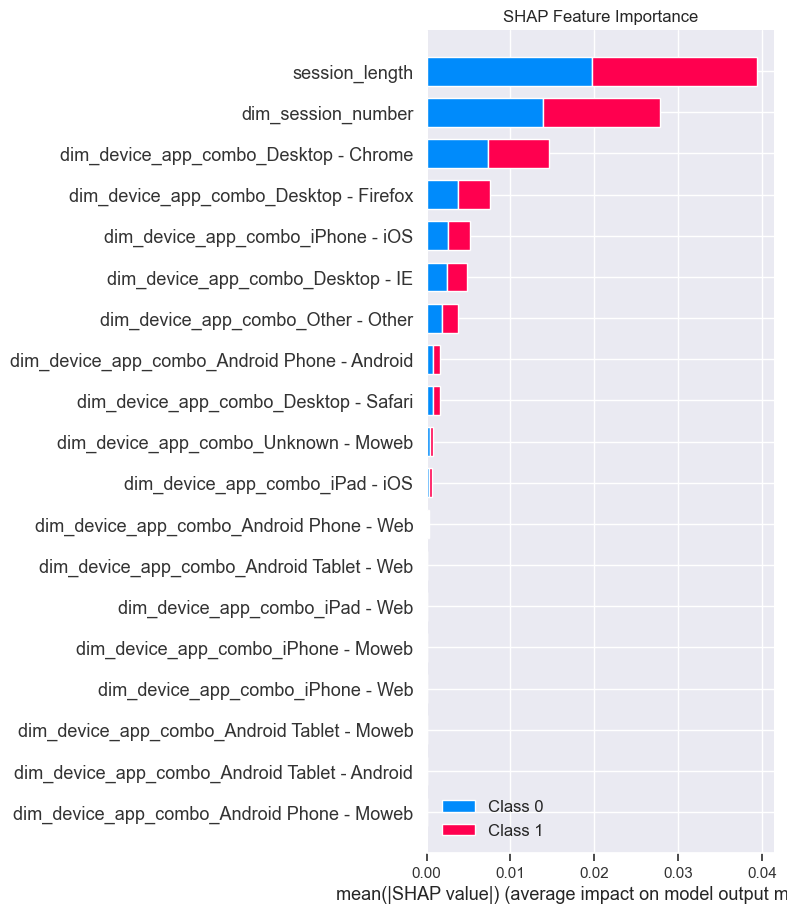

In [128]:
import pickle
from sklearn.inspection import permutation_importance
import shap

# Load the overall best model
with open('overall_best_model_instance.pkl', 'rb') as file:
    best_model = pickle.load(file)

# Assuming you have the original features X and labels y
# Access the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have the original preprocessor
# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Create a new pipeline with the preprocessor and the best model
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', best_model.named_steps['classifier'])
])

# Fit the new pipeline on the training data
final_pipeline.fit(X_train, y_train)

# Access the feature names after one-hot encoding
feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(input_features=onehot_ftrs)

# Combine the feature names with the continuous features
all_feature_names = list(feature_names) + minmax_ftrs + std_ftrs

# Assuming you have the test data X_test and y_test
# Create a new DataFrame with the preprocessed test data
X_test_processed = preprocessor.transform(X_test)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=all_feature_names)

# Assuming you have the true labels y_test and predicted labels y_pred_test
y_pred_test = final_pipeline.predict(X_test)

# Calculate the F-beta score on the test set
test_fbeta = fbeta_score(y_test, y_pred_test, beta=0.5)
print('Test F-beta (beta=0.5):', test_fbeta)

# Permutation Importance
result = permutation_importance(final_pipeline, X_test, y_test, n_repeats=10, random_state=42)


# SHAP Values
explainer = shap.Explainer(final_pipeline.named_steps['classifier'])
shap_values = explainer.shap_values(X_test_processed_df)

# Summary plot of SHAP values
shap.summary_plot(shap_values, X_test_processed_df, feature_names=all_feature_names, show=False)
plt.title('SHAP Feature Importance')
plt.savefig('shap_summary_plot.png', bbox_inches='tight')


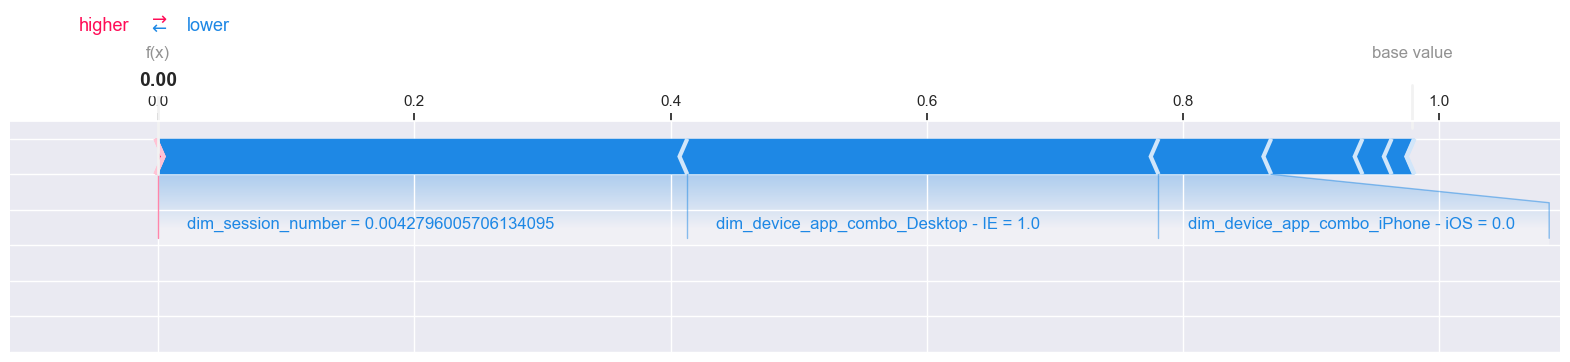

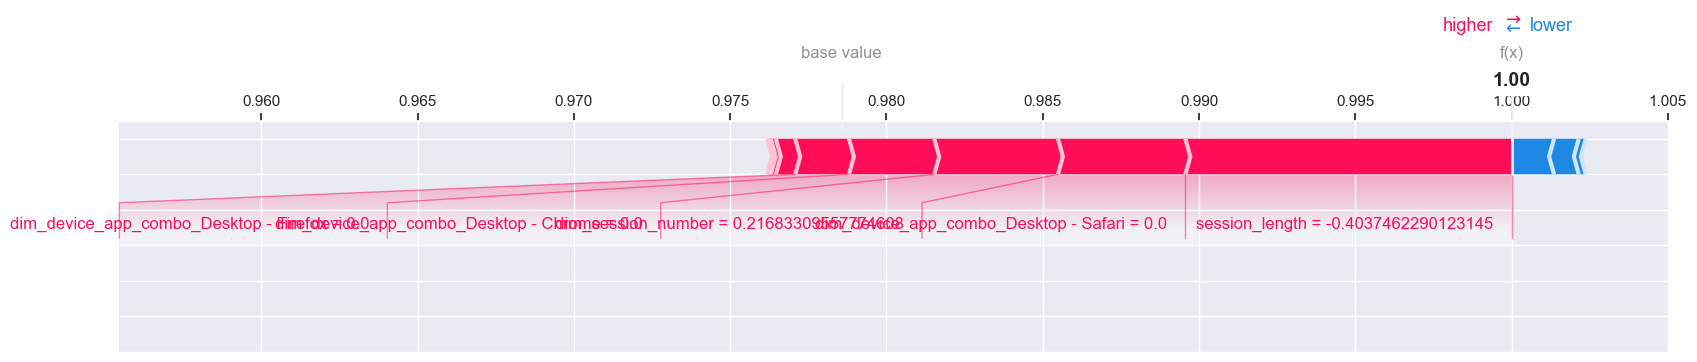

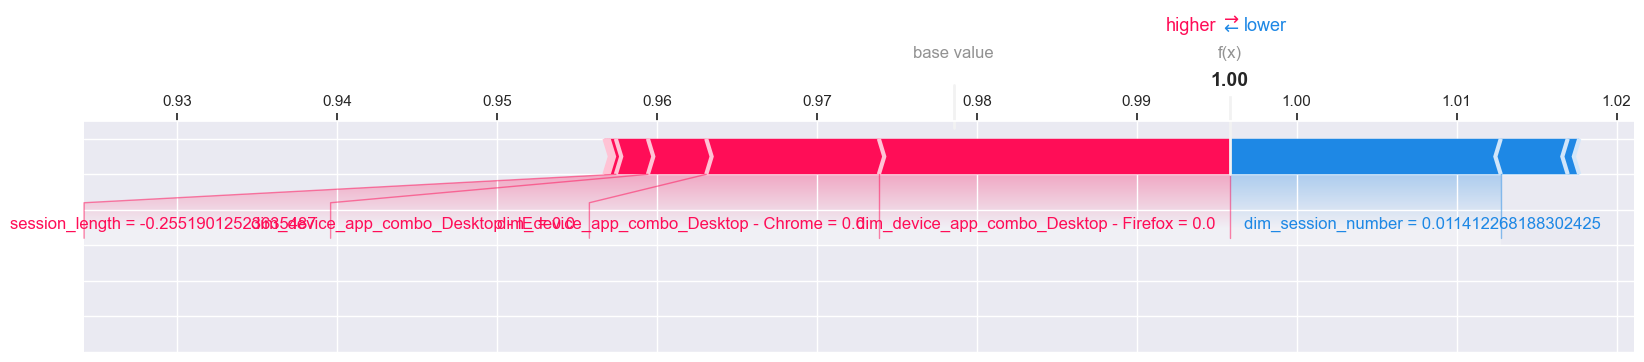

In [127]:
import shap

# Indices of data points to analyze
indices_to_analyze = [0, 500, 1000]

for idx in indices_to_analyze:
    # Calculate SHAP values for the specific data point
    shap_values_single = explainer.shap_values(X_test_processed_df.iloc[idx])[0]

    # Create and display a force plot
    shap.force_plot(
        base_value=explainer.expected_value[0],  # Assuming there's only one output
        shap_values=shap_values_single,
        features=X_test_processed_df.iloc[idx],
        feature_names=all_feature_names,
        matplotlib=True
    )
    plt.show()